# EDA

### Paso 1
#### Importar las librerias necesarias

In [17]:
import numpy as np
import pandas as pd

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

### Paso 2
### Cargar los datos

In [19]:
df = pd.read_csv("risk_factors_cervical_cancer.csv", sep = ",")

In [20]:
type(df)

pandas.core.frame.DataFrame

###  Vemos la estructura de la data

In [64]:
n = int(input("Ingrese las filas que desea ver"))
df.head(n)

ValueError: invalid literal for int() with base 10: ''

In [ ]:
df.tail(10)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
848,31,3.0,18.0,1.0,0.0,0.0,0.0,1.0,0.5,0.0,...,?,?,0,0,0,0,0,0,0,0
849,32,3.0,18.0,1.0,1.0,11.0,0.16,1.0,6.0,0.0,...,?,?,1,0,1,0,0,0,0,0
850,19,1.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
851,23,2.0,15.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
852,43,3.0,17.0,3.0,0.0,0.0,0.0,1.0,5.0,0.0,...,?,?,0,0,0,0,0,0,0,0
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0
857,29,2.0,20.0,1.0,0.0,0.0,0.0,1.0,0.5,0.0,...,?,?,0,0,0,0,0,0,0,0


## Vemos como está compuesto

In [ ]:
df.shape

(858, 36)

## Vemos estadística descriptiva

In [ ]:
df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [ ]:
df.Biopsy.describe()

count    858.000000
mean       0.064103
std        0.245078
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Biopsy, dtype: float64

## Sacamos valores únicos

In [ ]:
df.Biopsy.unique()

array([0, 1], dtype=int64)

In [ ]:
df.Smokes.unique()

array(['0.0', '1.0', '?'], dtype=object)

## Ver valores duplicados

In [ ]:
df.duplicated().sum()

23

## Ver nulos

In [ ]:
df.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


## Cambiar nombres a columnas

In [57]:
df.rename(columns = {"STDs:HPV" : "STDsHPV"} , inplace = True
         )

In [58]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokeryears,Smokerpackyear,Hormonal Contraceptives,Hormonalcontrayear,IUD,...,STDsTimesincefirstdiagnosis,STDsTimesincelastdiagnosis,DxCancer,DxCIN,DxHPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [59]:
print(df.columns)


Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokeryears', 'Smokerpackyear',
       'Hormonal Contraceptives', 'Hormonalcontrayear', 'IUD', 'IUDyear',
       'STDs', 'STDsnumber', 'STDscondylomatosis',
       'STDscervicalcondylomatosis', 'STDsvaginalcondylomatosis',
       'STDsvulvoperinealcondylomatosis', 'STDsyphilis',
       'STDspelvicinflammatorydisease', 'STDsgenitalherpes',
       'STDsmolluscumcontagiosum', 'STDsAIDS', 'STDsHIV', 'STDsHepatitisB',
       'STDsHPV', 'STDsNumberofdiagnosis', 'STDsTimesincefirstdiagnosis',
       'STDsTimesincelastdiagnosis', 'DxCancer', 'DxCIN', 'DxHPV', 'Dx',
       'Hinselmann', 'Schiller', 'Citology', 'Biopsy'],
      dtype='object')


### Ver frecuencias

In [46]:
df.DxCancer.value_counts()

0    840
1     18
Name: DxCancer, dtype: int64

In [24]:
df.target.value_counts(normalize = True)

1    0.398876
0    0.331461
2    0.269663
Name: target, dtype: float64

## Identificación del Tipo de Variables


### Variables cuantitativas continuas: 
Age, Number.of.sexual.partners, First.sexual.intercourse, Num.of.pregnancies, Smokes.years, Smokes.packs.per.year, Hormonal.Contraceptives.years, IUD.years, STDs.Time.since.first.diagnosis, STDs.Time.since.last.diagnosis.

### Variables cuantitativas discretas: 
STDs.number, STDs.Number.of.diagnosis.

### Variables categóricas: 
Smokes, Hormonal.Contraceptives, IUD, STDs, todas las variables individuales de STDs, Dx.Cancer, Dx.CIN, Dx.HPV, Dx, Hinselmann, Schiller, Citology, Biopsy.


## Graficar

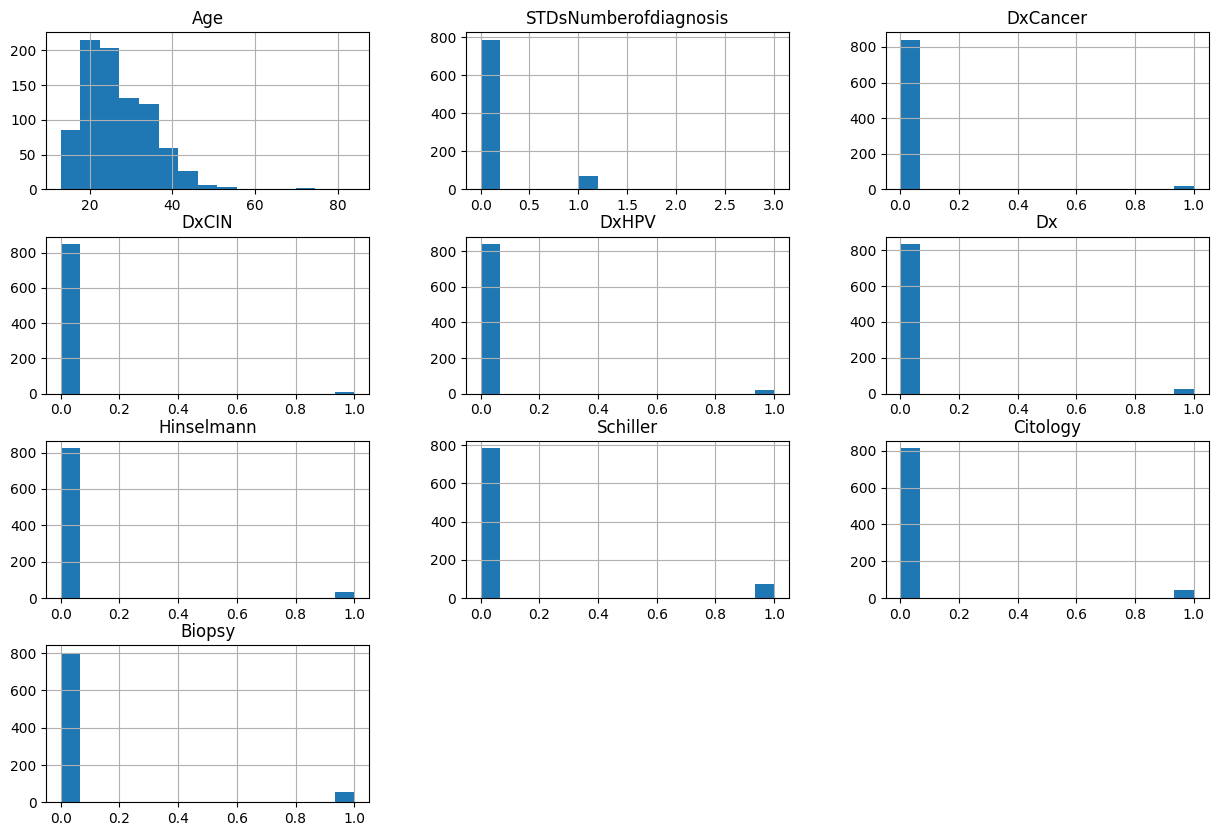

In [47]:
# Histogramas para variables cuantitativas
df.hist(bins=15, figsize=(15, 10))
plt.show()

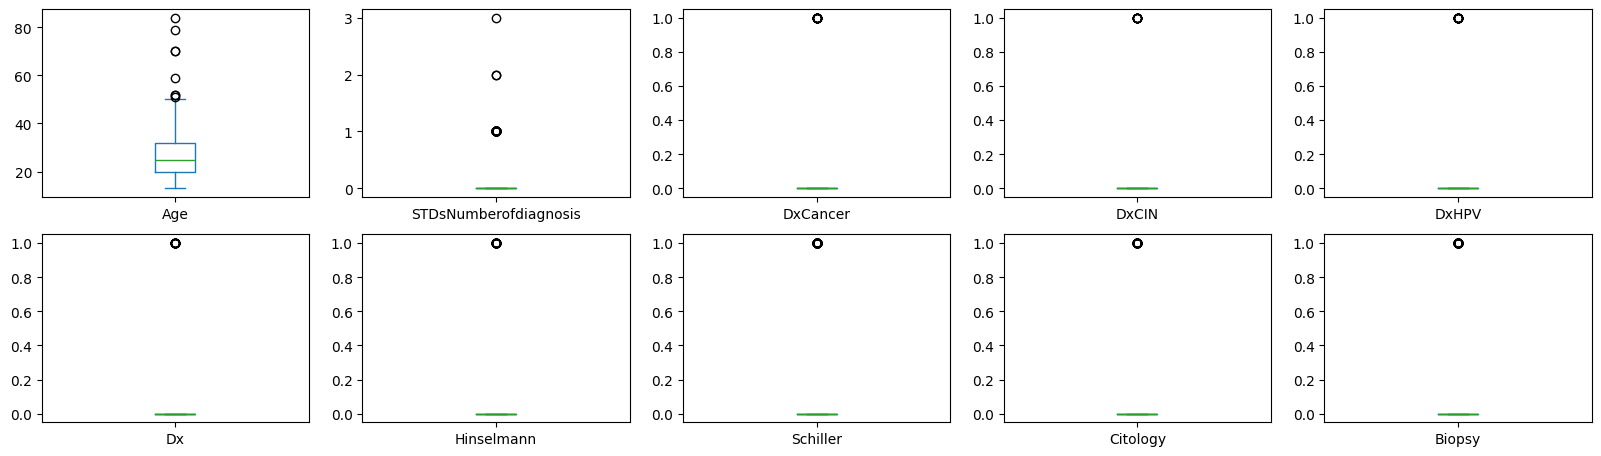

In [48]:
# Boxplots para variables cuantitativas
df.plot(kind='box', subplots=True, layout=(7,5), figsize=(20, 20))
plt.show()


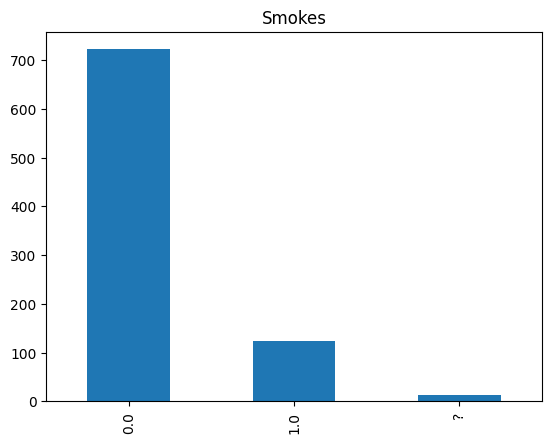

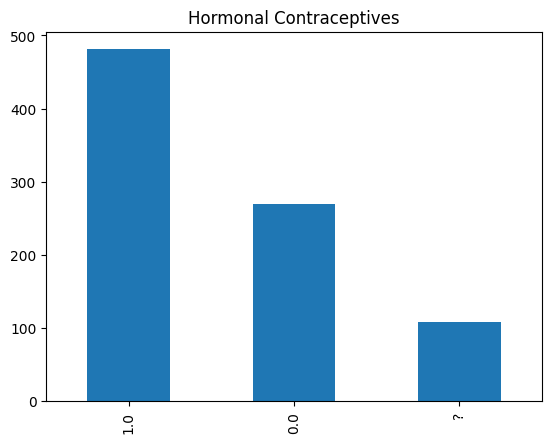

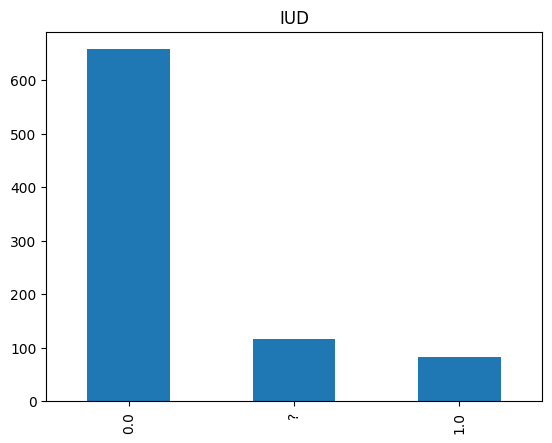

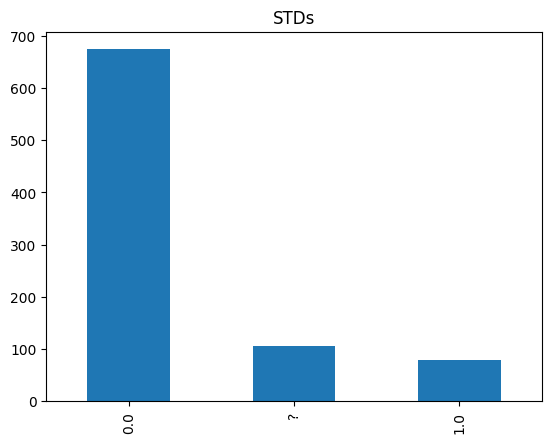

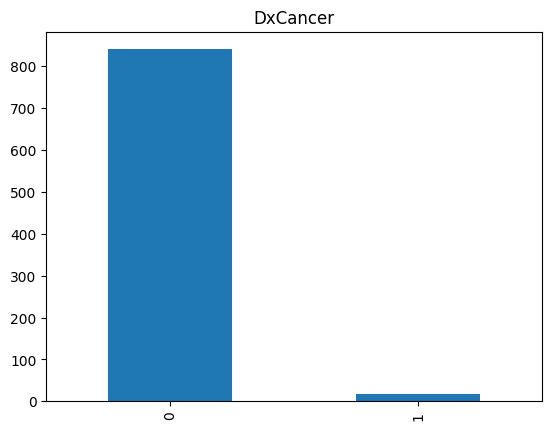

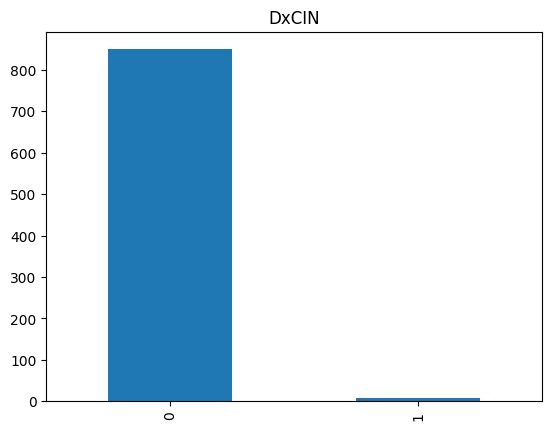

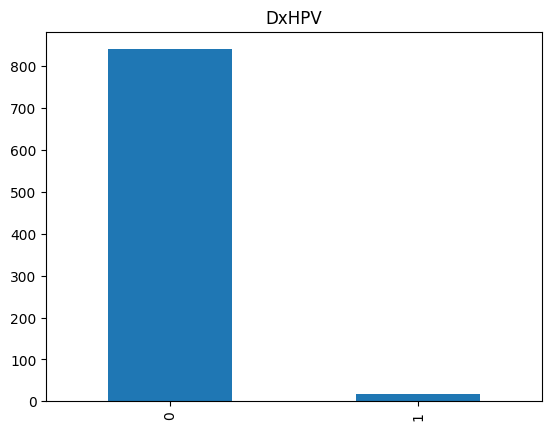

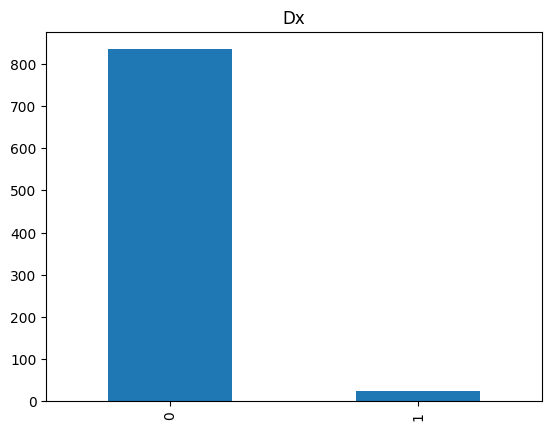

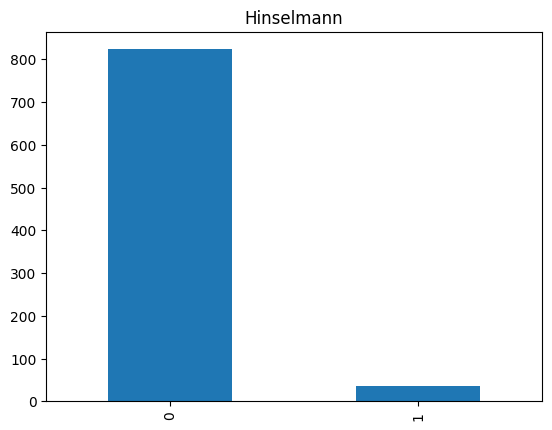

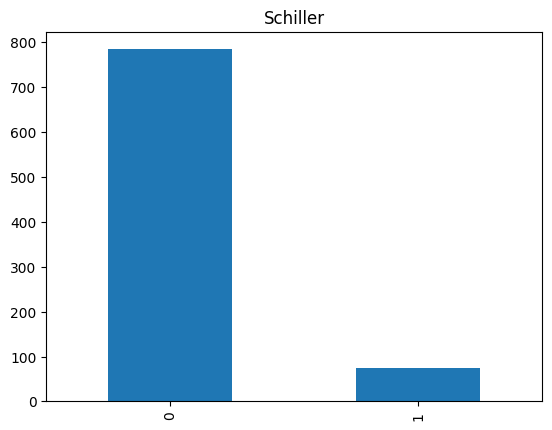

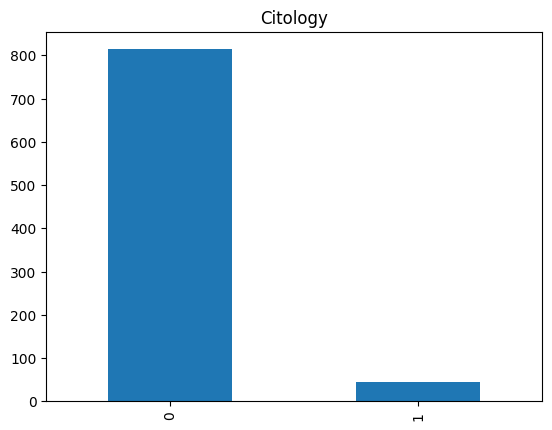

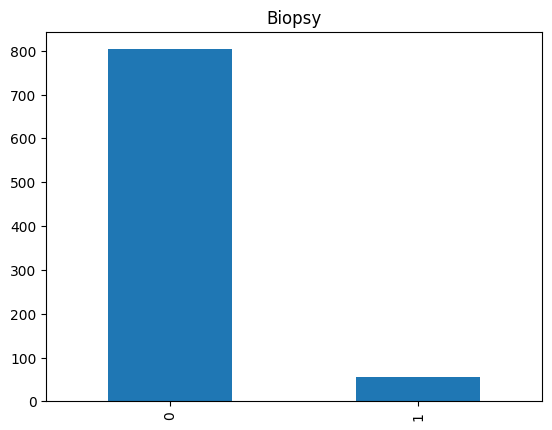

In [60]:
# Gráficos de barras para variables categóricas
# Gráficos de barras para variables categóricas
categorical_vars = [
    'Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs', 'DxCancer', 'DxCIN', 
    'DxHPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy'
]

for var in categorical_vars:
    df[var].value_counts().plot(kind='bar')
    plt.title(var)
    plt.show()


C:\Users\jenni\AppData\Local\Temp\ipykernel_12708\964128836.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


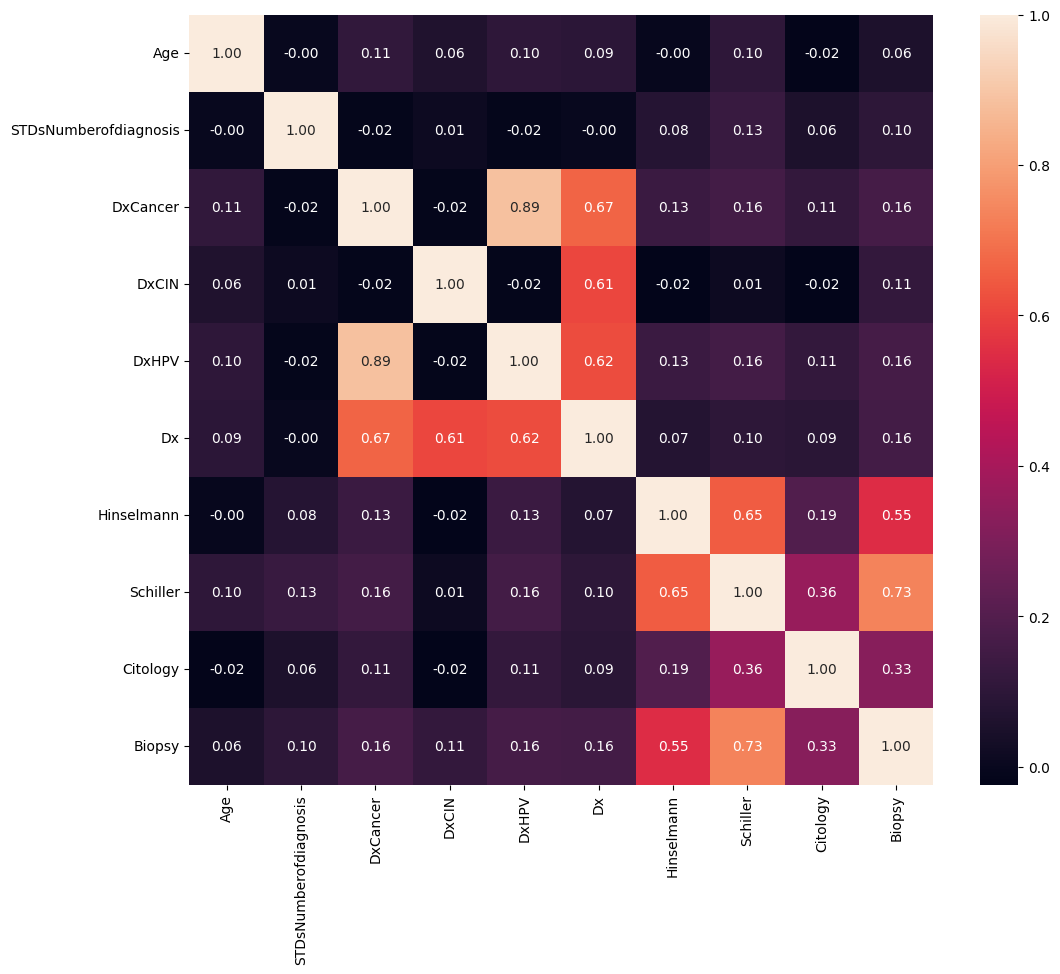

In [61]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()

In [62]:
for var in categorical_vars:
    print(f"Frecuencia de {var}:")
    print(df[var].value_counts())
    print(f"Proporciones de {var}:")
    print(df[var].value_counts(normalize=True))

Frecuencia de Smokes:
0.0    722
1.0    123
?       13
Name: Smokes, dtype: int64
Proporciones de Smokes:
0.0    0.841492
1.0    0.143357
?      0.015152
Name: Smokes, dtype: float64
Frecuencia de Hormonal Contraceptives:
1.0    481
0.0    269
?      108
Name: Hormonal Contraceptives, dtype: int64
Proporciones de Hormonal Contraceptives:
1.0    0.560606
0.0    0.313520
?      0.125874
Name: Hormonal Contraceptives, dtype: float64
Frecuencia de IUD:
0.0    658
?      117
1.0     83
Name: IUD, dtype: int64
Proporciones de IUD:
0.0    0.766900
?      0.136364
1.0    0.096737
Name: IUD, dtype: float64
Frecuencia de STDs:
0.0    674
?      105
1.0     79
Name: STDs, dtype: int64
Proporciones de STDs:
0.0    0.785548
?      0.122378
1.0    0.092075
Name: STDs, dtype: float64
Frecuencia de DxCancer:
0    840
1     18
Name: DxCancer, dtype: int64
Proporciones de DxCancer:
0    0.979021
1    0.020979
Name: DxCancer, dtype: float64
Frecuencia de DxCIN:
0    849
1      9
Name: DxCIN, dtype: int64

## Valores faltantes

In [63]:
missing_data = df.isnull().mean() * 100
print(missing_data[missing_data > 0])


Series([], dtype: float64)
